In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
#API URL code used to import data from Pro Basketball API

teams = {
'Atlanta Hawks':1610612737,
'Boston Celtics':1610612738,
'Brooklyn Nets':1610612751,
'Charlotte Hornets':1610612766,
'Chicago Bulls':1610612741,
'Cleveland Cavaliers':1610612739,
'Dallas Mavericks':1610612742,
'Denver Nuggets':1610612743,
'Detroit Pistons':1610612765,
'Golden State Warriors':1610612744,
'Houston Rockets':1610612745,
'Indiana Pacers':1610612754,
'Los Angeles Clippers':1610612746,
'Los Angeles Lakers':1610612747,
'Memphis Grizzlies':1610612763,
'Miami Heat':1610612748,
'Milwaukee Bucks':1610612749,
'Minnesota Timberwolves':1610612750,
'New Orleans Pelicans':1610612740,
'New York Knicks':1610612752,
'Oklahoma City Thunder':1610612760,
'Orlando Magic':1610612753,
'Philadelphia 76ers':1610612755,
'Phoenix Suns':1610612756,
'Portland Trail Blazers':1610612757,
'Sacramento Kings':1610612758,
'San Antonio Spurs':1610612759,
'Toronto Raptors':1610612761,
'Utah Jazz':1610612762,
'Washington Wizards':1610612764
}

#
teamDF = pd.Series(teams)

In [ ]:
import urllib, json, requests

url_1='http://api.probasketballapi.com/misc/team'
# game, team, advanced/team, misc/team, sportsvu/team

api_key='H5Mif6zr1Nmjt9A8XgEcF4DVB0SsPKxQ'

for team, id in teams.items():
    payload = {'api_key': api_key, 'team_id': id}

    r = requests.post(url_1, data=payload)
    print (r.text)

In [3]:
advTeamStats = pd.read_csv("Basketball_Stats/advanced_team_stats.csv")
finalSVUStats = pd.read_csv("Basketball_Stats/final_svu_teams.csv")
miscTeamStats = pd.read_csv("Basketball_Stats/misc_team_stats.csv")
winslosses = pd.read_csv("Basketball_Stats/nbaseas1.csv")
shotinfo = pd.read_csv("Basketball_Stats/nbaseas2.csv")
NBAstatsTeam = pd.read_csv("Basketball_Stats/nbaseasadv.csv")
teamDef = pd.read_csv("Basketball_Stats/nbaTeamDef2014_2016.csv")

In [4]:
advTeamStats.head()

,ast_pct,ast_ratio,ast_tov,def_rating,dreb_pct,efg_pct,game_id,min,off_rating,opponent_id,oreb_pct,pace,period,pie,season,team_id,tm_tov_pct,treb_pct,ts_pct,usg_pct,team
0,0.650,19.6,1.37,110.6,0.667,0.581,21400008,240:00:00,105.7,1610612761,0.238,97.50,f,0.453,2014,1610612737,19.7,0,0.583,0.196,Hawks
1,0.743,21.2,2.00,94.6,0.756,0.558,21400032,240:00:00,109.1,1610612754,0.083,95.38,f,0.606,2014,1610612737,13.9,0,0.611,0.198,Hawks
2,0.684,19.0,1.86,98.2,0.711,0.457,21400064,240:00:00,91.2,1610612759,0.204,98.28,f,0.439,2014,1610612737,13.9,0,0.475,0.198,Hawks
3,0.615,17.3,1.41,100.0,0.744,0.523,21400071,265:00:00,102.4,1610612766,0.159,98.46,f,0.458,2014,1610612737,15.8,0,0.564,0.200,Hawks
4,0.545,14.5,2.00,105.7,0.690,0.463,21400084,240:00:00,109.8,1610612752,0.279,92.34,f,0.541,2014,1610612737,9.6,0,0.532,0.198,Hawks


In [5]:
finalSVUStats.head()

,cfga,cfgm,dfga,dfgm,dist,drbc,ftast,game_id,opponent_id,orbc,pass,period,sast,season,spd,tchs,team_id,ufga,ufgm,team
0,39,17,33,13,9.99,56,3,21400008,1610612761,23,127,f,9,2014,0,127,1610612737,41,23,Hawks
1,28,12,26,17,9.99,58,4,21400032,1610612754,12,127,f,5,2014,0,127,1610612737,41,23,Hawks
2,51,23,35,19,9.99,50,1,21400064,1610612759,32,127,f,3,2014,0,127,1610612737,41,15,Hawks
3,45,21,34,23,9.99,53,1,21400071,1610612766,14,127,f,6,2014,0,127,1610612737,48,22,Hawks
4,42,19,35,23,9.99,52,3,21400084,1610612752,21,127,f,4,2014,0,127,1610612737,39,14,Hawks


In [6]:
miscTeamStats.head()

,blk,blka,game_id,opp_pts_2nd_chance,opp_pts_fb,opp_pts_off_tov,opp_pts_paint,opponent_id,period,pf,pfd,pts_2nd_chance,pts_fb,pts_off_tov,pts_paint,season,team_id,team
0,8,9,21400008,26,18,23,40,1610612761,f,24,22,11,10,14,36,2014,1610612737,Hawks
1,6,5,21400032,24,5,13,26,1610612754,f,20,26,5,15,20,28,2014,1610612737,Hawks
2,5,9,21400064,14,18,15,34,1610612759,f,25,15,13,11,14,40,2014,1610612737,Hawks
3,2,7,21400071,22,1,22,50,1610612766,f,30,28,11,15,18,38,2014,1610612737,Hawks
4,5,6,21400084,15,9,12,40,1610612752,f,17,29,19,10,17,34,2014,1610612737,Hawks


In [7]:
# Andy - stored shot info into new variable - shotinfo_update so that 'Team' permanently changes to 'team'
shotinfo_update = shotinfo.rename(columns = {"Team":"team"})

In [8]:
# Andy - print shot_info update to verify 'Team" changed to 'team'
shotinfo_update.head()

,team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Warriors,2014,3410,7137,47.8,2527,4920,0.513618,883,2217,39.8,1313,1709,76.8,853,2814,3667,2248,1185,762,496,293,1628,1541,828
1,Hawks,2014,3121,6699,46.6,2303,4547,0.506488,818,2152,38.0,1349,1735,77.8,715,2611,3326,2111,1167,744,380,404,1457,1611,445
2,Rockets,2014,3032,6832,44.4,2099,4152,0.505539,933,2680,34.8,1525,2133,71.5,958,2624,3582,1820,1366,776,407,437,1803,1730,282
3,Clippers,2014,3228,6830,47.3,2401,4628,0.518799,827,2202,37.6,1468,2067,71.0,784,2711,3495,2031,1012,640,409,245,1749,1766,540
4,Grizzlies,2014,3097,6763,45.8,2674,5517,0.484684,423,1246,33.9,1445,1869,77.3,856,2634,3490,1777,1094,700,347,424,1567,1662,266


In [ ]:
# Andy - save shotinfo_update to csv to change Blazers to Trail Blazers
# shotinfo_update.to_csv('shotinfo_fixblazers.csv')

In [9]:
# Andy reimport shotinfo_fixblazers 
shotinfo_final = pd.read_csv('shotinfo_fixblazers.csv')

In [10]:
#merge dataframes on game_id
advmiscteam = advTeamStats.merge(miscTeamStats,on="game_id")

In [11]:
#merge dataframes on game_id
advmiscteam = advTeamStats.merge(miscTeamStats,on="game_id")
advmiscsvuDF = advmiscteam.merge(finalSVUStats,on="game_id")

In [12]:
# create dataframe with selected columns
teamsDF = advmiscsvuDF[['game_id','team','season','ufga','ufgm','pts_off_tov','pts_paint']]
teamsDF.head()

,game_id,team,season,ufga,ufgm,pts_off_tov,pts_paint
0,21400008,Hawks,2014,41,23,14,36
1,21400008,Raptors,2014,43,17,14,36
2,21400008,Hawks,2014,41,23,23,40
3,21400008,Raptors,2014,43,17,23,40
4,21400008,Hawks,2014,41,23,14,36


In [13]:
# groupby on teams, game_ID, and season
teamsDF2 = teamsDF.groupby(["team","game_id","season"]).sum()

In [14]:
teamsDF3 = teamsDF2.reset_index()
teamsDF3.head()

,team,game_id,season,ufga,ufgm,pts_off_tov,pts_paint
0,76ers,21400005,2014,88,32,74,160
1,76ers,21400023,2014,132,52,86,184
2,76ers,21400030,2014,124,60,100,160
3,76ers,21400043,2014,144,68,124,132
4,76ers,21400058,2014,156,68,68,200


In [15]:
# get custom columns from DF
teamsDF4 = teamsDF3[['team','season','ufga','ufgm','pts_off_tov','pts_paint']]
teamsDF4.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint
0,76ers,2014,88,32,74,160
1,76ers,2014,132,52,86,184
2,76ers,2014,124,60,100,160
3,76ers,2014,144,68,124,132
4,76ers,2014,156,68,68,200


df1 = teamsDF4.loc[teamsDF4["team"]=="Bulls"]

writer = pd.ExcelWriter('NBA.xlsx')
df1.to_excel(writer,'Sheet1')



In [16]:
#group by team and season to get sum of stats
teamsDF5 = teamsDF4.groupby(["team","season"]).sum()
teamsDF6 = teamsDF5.reset_index()

#created first custom statistic oncontested FG%
teamsDF6["ufgp"] = teamsDF6["ufgm"] / teamsDF6["ufga"]
teamsDF6.sort_values("ufgp",ascending = False).head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp
85,Warriors,2015,16728,8280,6948,18348,0.494978
89,Wizards,2016,1384,648,608,1512,0.468208
84,Warriors,2014,16408,7664,7050,17724,0.467089
86,Warriors,2016,1436,668,640,1684,0.465181
15,Clippers,2014,16248,7528,5926,15028,0.463319


df1 = teamsDF5
writer = pd.ExcelWriter('NBADF.xlsx')
df1.to_excel(writer,'Sheet1')


In [17]:
#create DF with wins/losses
winslosses2 = winslosses.rename(columns={"Team":"team","Season":"season"})
winslosses2.head()

,team,Wins,Losses,season
0,Warriors,67,15,2014
1,Hawks,60,22,2014
2,Rockets,56,26,2014
3,Clippers,56,26,2014
4,Grizzlies,55,27,2014


In [ ]:
# Andy save winslosses2 to csv to fix Blazers to Trail Blazers
# winslosses2.to_csv('winslosses2_fixblazers.csv')

In [18]:
# Andy - reimport winslosses2 with updated Trail Blazers
winslosses2_Final = pd.read_csv('winslosses2_fixblazers.csv')

In [ ]:
# Andy - check that Blazers is now Trail Blazers
# winslosses2_Final['team'].value_counts()

In [19]:
# Andy - updated winslosses2 to winslosses2_Final so the Blazers is updated to Trail Blazers
FinalNBADF = teamsDF6.merge(winslosses2_Final,on=["team","season"])

In [ ]:
# Andy - check that Blazers is updated to Trail Blazers
# FinalNBADF['team'].value_counts()

In [20]:
# sort by wins
FinalNBADF.sort_values("Wins",ascending=False).head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses
85,Warriors,2015,16728,8280,6948,18348,0.494978,73,9
70,Spurs,2015,14888,6848,7772,21476,0.459968,67,15
86,Warriors,2016,1436,668,640,1684,0.465181,67,15
84,Warriors,2014,16408,7664,7050,17724,0.467089,67,15
71,Spurs,2016,1548,656,568,1476,0.423773,61,21


In [21]:
shotinfo.head()

,Team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Warriors,2014,3410,7137,47.8,2527,4920,0.513618,883,2217,39.8,1313,1709,76.8,853,2814,3667,2248,1185,762,496,293,1628,1541,828
1,Hawks,2014,3121,6699,46.6,2303,4547,0.506488,818,2152,38.0,1349,1735,77.8,715,2611,3326,2111,1167,744,380,404,1457,1611,445
2,Rockets,2014,3032,6832,44.4,2099,4152,0.505539,933,2680,34.8,1525,2133,71.5,958,2624,3582,1820,1366,776,407,437,1803,1730,282
3,Clippers,2014,3228,6830,47.3,2401,4628,0.518799,827,2202,37.6,1468,2067,71.0,784,2711,3495,2031,1012,640,409,245,1749,1766,540
4,Grizzlies,2014,3097,6763,45.8,2674,5517,0.484684,423,1246,33.9,1445,1869,77.3,856,2634,3490,1777,1094,700,347,424,1567,1662,266


In [22]:
shotinfo2 = shotinfo[["Team", "season"]]

In [23]:
# change name on shotinfo
shotinfo2 = shotinfo.rename(columns = {"Team":"team"})

In [ ]:
# Andy save shotinfo2 to csv to update Blazers to Trail Blazers
# shotinfo2.to_csv('shotinfo2_fixblazers.csv')

In [24]:
# Andy import shotinfo2_fixblazers
shotinfo2_final = pd.read_csv('shotinfo2_fixblazers.csv')
shotinfo2_final.head()

,team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,76ers,2014,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736
1,76ers,2015,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839
2,76ers,2016,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467
3,Trail Blazers,2014,3175,7049,45.0,2368,4818,0.491490,807,2231,36.2,1272,1589,80.1,879,2881,3760,1799,1117,525,372,297,1494,1534,347
4,Trail Blazers,2015,3167,7040,45.0,2303,4704,0.489583,864,2336,37.0,1424,1889,75.4,948,2782,3730,1748,1200,562,380,424,1782,1597,68


In [ ]:
# Andy test - Blazers was updated to Trail Blazers
# shotinfo2_final['team'].value_counts()

In [25]:
# Andy - updated shotinfo2 to shotinfo2_final so that Blazers is Trail Blazers
FinalDF = FinalNBADF.merge(shotinfo2_final,on=["team","season"])
FinalDF.sort_values("pts_paint",ascending=True)


FinalDF.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,6722,45.9,2538,5222,0.486021,545,1500,36.3,1312,1734,75.7,876,2574,3450,1932,1373,789,403,392,1814,1649,35
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343


In [ ]:
# Andy fix NBAstatsTeam Blazers to Trail Blazers
# NBAstatsTeam.to_csv('NBAstatsTeam_fixblazers.csv')

In [26]:
# Andy import fixed NBAstatsTeam
NBAstatsTeam_final = pd.read_csv('NBAstatsTeam_fixblazers.csv')

In [27]:
# Andy - updated NBAstatsTeam to NBAstatsTeam_final to fix Blazers to Trail Blazers
FinalDF2 = FinalDF.merge(NBAstatsTeam_final, on=["team","season"])
FinalDF2.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736,28,14,14,1364,104.2,104.2,0.0,65.7,1.48,18.5,26.4,78.3,53.1,17.1,51.8,55.3,103.13,51.3
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839,82,10,72,3961,96.6,106.7,-10.0,59.4,1.31,16.3,20.6,74.0,46.4,16.2,48.7,51.9,100.23,42.8
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467,82,28,54,3966,100.7,106.4,-5.7,63.1,1.43,17.6,22.4,75.3,48.8,16.4,50.1,53.9,100.96,47.0
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,6722,45.9,2538,5222,0.486021,545,1500,36.3,1312,1734,75.7,876,2574,3450,1932,1373,789,403,392,1814,1649,35,27,15,12,1301,107.2,106.5,0.8,56.9,1.67,17.5,18.8,76.3,47.3,13.7,53.4,56.9,97.37,50.3
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343,82,33,49,3966,102.2,105.7,-3.5,60.3,1.52,17.7,24.9,73.1,49.2,15.7,49.9,53.7,96.55,48.3


In [ ]:
# Andy save teamDef to fix Blazers
# teamDef.to_csv('teamDef_fixblazers.csv')

In [28]:
# Andy import teamDef_fixblazers.csv encoding="latin1"
teamDef_final = pd.read_csv('teamDef_fixblazers.csv', encoding="latin1")
teamDef_final.head()

,team,season,GP,W,L,MIN,DEFåÊRTG,DREB,DREB%,STL,BLK,OPPåÊPTS OFFåÊTOV,OPPåÊPTS 2NDåÊCHANCE,OPPåÊPTS FB,OPPåÊPTS PAINT
0,76ers,2014,82,18,64,3961,102,2536,73.0,789,487,1687,1144,1200,3420
1,76ers,2015,82,10,72,3961,107,2605,74.0,680,495,1639,1207,1370,3736
2,76ers,2016,82,28,54,3966,106,2706,75.3,692,420,1517,1106,1256,3698
3,Trail Blazers,2014,82,51,31,3971,101,2881,76.2,525,372,1241,1129,1094,3534
4,Trail Blazers,2015,82,44,38,3961,106,2782,76.2,562,380,1338,1017,907,3354


In [29]:
# Andy - updated teamDef to teamDef_final to fix Blazers to Trail Blazers

FinalDF3 = FinalDF2.merge(teamDef_final, on = ["team","season"])
FinalDF3.head()
finalDFcorr = FinalDF3

In [ ]:
# Andy - test to make sure that Blazers is Trail Blazers
# FinalDF3['team'].value_counts()

In [30]:
# test correlation between wins and uncontested FG% custom statistic
FinalDF3["Wins"].corr(FinalDF3["ufgp"])

0.46430830681421931

In [31]:
# Andy - ran and it looks like the columns with weird characters was updated
finalDFcolumns = FinalDF3.columns.values.tolist()
finalDFcolumns

['team',
 'season',
 'ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'FGM',
 'FGA',
 'FG%',
 '2pm',
 '2pa',
 '2p%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'GP_x',
 'W_x',
 'L_x',
 'MIN_x',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'GP_y',
 'W_y',
 'L_y',
 'MIN_y',
 'DEFåÊRTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPPåÊPTS OFFåÊTOV',
 'OPPåÊPTS 2NDåÊCHANCE',
 'OPPåÊPTS FB',
 'OPPåÊPTS PAINT']

**Original list from Lorenzo**

FinalDFcorr = FinalDF3[['ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'UncontestedAssists',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'DEF\xa0RTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPP\xa0PTS OFF\xa0TOV',
 'OPP\xa0PTS 2ND\xa0CHANCE',
 'OPP\xa0PTS FB',
 'OPP\xa0PTS PAINT']]



In [32]:
# Andy - updated the weird column headers
FinalDFcorr = FinalDF3[['ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 #'UncontestedAssists',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'DEFåÊRTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPPåÊPTS OFFåÊTOV',
 'OPPåÊPTS 2NDåÊCHANCE',
 'OPPåÊPTS FB',
 'OPPåÊPTS PAINT']]

In [33]:
# test correlation between wins and TOV%
FinalDF3["Wins"].corr(FinalDF3["TOV%"])

-0.22302415344103638

In [ ]:
# FinalDF3.to_csv('FinalDF3_andyupdates.csv', index=False)

In [ ]:
# save FinalDF3_andyupdates - to delete uncontested assists in columns
# FinalDF3.to_csv('FinalDF3_andy_del_uncontested_assists.csv', index=False)

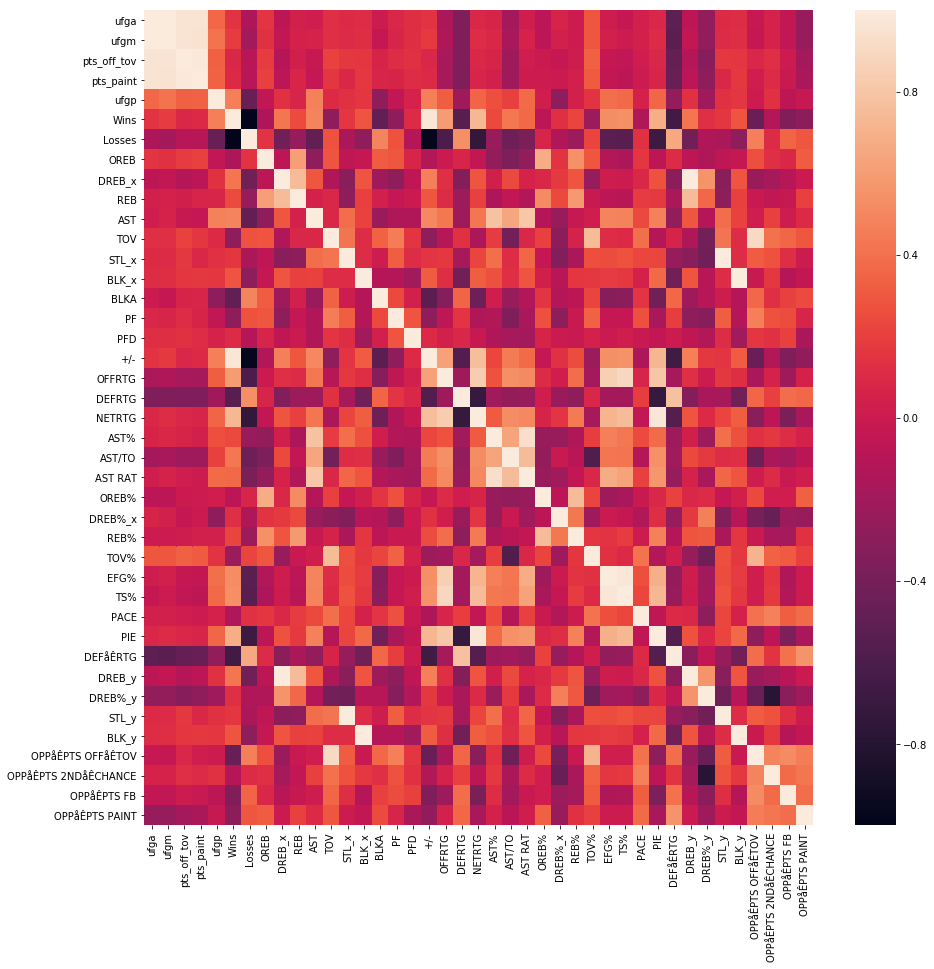

In [34]:
#create custom correlation matrix for all data to find correlations to look into
import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDFcorr.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.savefig("CorrelationMatrixAll.png")
plt.show()

In [ ]:
# Andy Updates
# FinalDF3.to_excel("FinalDF_andyupdates.xls")

In [ ]:
# Blazers Updated to Trail Blazers on FinalDF3
# FinalDF3['team'].value_counts()

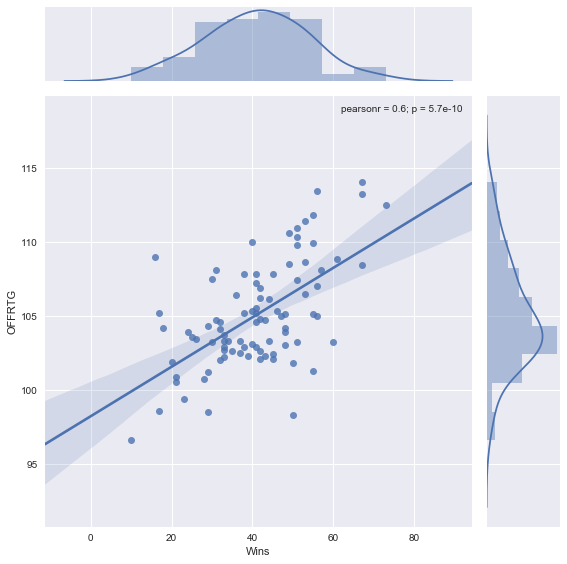

In [35]:
# Andy - linear regression 
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Wins", y="OFFRTG", data=FinalDF3, kind="reg", size=8);
plt.savefig('OFFRTG.png')

In [36]:
# Andy import FinalDF3 where duplicate columns were dropped
FinalDFexcel = pd.read_excel("FinalDF_andyupdates.xls")
FinalDFexcel.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists,GP,MIN_x,MIN_y,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,TOV%,EFG%,TS%,PACE,PIE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736,2.742721,82,1364,3961,104.2,0.0,65.7,1.48,18.5,26.4,78.3,17.1,51.8,55.3,103.13,51.3,1687,1144,1200,3420
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839,2.946176,82,3961,3961,106.7,-10.0,59.4,1.31,16.3,20.6,74.0,16.2,48.7,51.9,100.23,42.8,1639,1207,1370,3736
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467,0.322217,82,3966,3966,106.4,-5.7,63.1,1.43,17.6,22.4,75.3,16.4,50.1,53.9,100.96,47.0,1517,1106,1256,3698
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,6722,45.9,2538,5222,0.486021,545,1500,36.3,1312,1734,75.7,876,2574,3450,1932,1373,789,403,392,1814,1649,35,3.016563,82,1301,3986,106.5,0.8,56.9,1.67,17.5,18.8,76.3,13.7,53.4,56.9,97.37,50.3,1374,1092,877,3262
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343,2.290237,82,3966,3966,105.7,-3.5,60.3,1.52,17.7,24.9,73.1,15.7,49.9,53.7,96.55,48.3,1453,1153,1068,3606


In [38]:
# New Custom Stats

# created a new statistic for uncontested assist. Uncontested FG / Assists
FinalDFexcel["Uncontested Assists"] = FinalDFexcel["ufgm"] / FinalDF["AST"]

# Pace Adjusted Offensive Rebounds
FinalDFexcel["OR_PACE"] = FinalDFexcel["OREB"]/FinalDFexcel["PACE"]

# Pace Adjusted Defensive Rebounds
FinalDFexcel["DR_PACE"] = FinalDFexcel["DREB"]/FinalDFexcel["PACE"]

# Pace Adjusted 3 pointers made
FinalDFexcel["3PM_PACE"] = FinalDFexcel["3PM"]/FinalDFexcel["PACE"]

# Pace Adjusted 2 pointers made
FinalDFexcel["2PM_PACE"] = FinalDFexcel["2pm"]/FinalDFexcel["PACE"]

# Pace Adjusted Assists
FinalDFexcel["AST_PACE"] = FinalDFexcel["AST"]/FinalDFexcel["PACE"]

# Pace Adjusted Uncontested Assists
FinalDFexcel["UA_PACE"] = FinalDFexcel["UncontestedAssists"]/FinalDFexcel["PACE"]

# Pace ratio of points of turnovers and opponent points off turnovers
FinalDFexcel["TO_RATIO"] = FinalDFexcel["pts_off_tov"]/FinalDFexcel["OPP PTS OFF TOV"]

# Steals plus Blocks
FinalDFexcel["STOCKS"] = FinalDFexcel["STL"] + FinalDFexcel["BLK"]

# Pace Adjusted Stocks
FinalDFexcel["STOCKS_PACE"] = FinalDFexcel["STOCKS"] / FinalDFexcel["PACE"]




FinalDFexcel.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists,GP,MIN_x,MIN_y,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,TOV%,EFG%,TS%,PACE,PIE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT,Uncontested Assists,OR_PACE,DR_PACE,3PM_PACE,2PM_PACE,AST_PACE,UA_PACE,TO_RATIO,STOCKS,STOCKS_PACE
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736,2.742721,82,1364,3961,104.2,0.0,65.7,1.48,18.5,26.4,78.3,17.1,51.8,55.3,103.13,51.3,1687,1144,1200,3420,2.742721,9.483177,24.590323,6.709978,20.100844,16.319209,0.026595,3.676349,1276,12.372733
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839,2.946176,82,3961,3961,106.7,-10.0,59.4,1.31,16.3,20.6,74.0,16.2,48.7,51.9,100.23,42.8,1639,1207,1370,3736,2.946176,7.752170,25.990222,7.622468,22.009378,17.609498,0.029394,4.584503,1175,11.723037
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467,0.322217,82,3966,3966,106.4,-5.7,63.1,1.43,17.6,22.4,75.3,16.4,50.1,53.9,100.96,47.0,1517,1106,1256,3698,0.322217,7.993265,26.802694,8.230983,22.355388,19.304675,0.003192,0.412657,1112,11.014263
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,6722,45.9,2538,5222,0.486021,545,1500,36.3,1312,1734,75.7,876,2574,3450,1932,1373,789,403,392,1814,1649,35,3.016563,82,1301,3986,106.5,0.8,56.9,1.67,17.5,18.8,76.3,13.7,53.4,56.9,97.37,50.3,1374,1092,877,3262,3.016563,8.996611,26.435247,5.597207,26.065523,19.841840,0.030980,4.604076,1192,12.241964
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343,2.290237,82,3966,3966,105.7,-3.5,60.3,1.52,17.7,24.9,73.1,15.7,49.9,53.7,96.55,48.3,1453,1153,1068,3606,2.290237,8.886587,26.504402,4.557224,28.016572,19.627136,0.023721,4.075705,1147,11.879855


In [39]:
# custom data frame for stats that we want to look into more in depth
FinalDF4 = FinalDFexcel[['team', 'season', 'Wins', 'Losses', 'ufga', 'ufgm', 'ufgp', 'pts_off_tov', 'TO_RATIO', 'pts_paint',  'FGM', 'FGA', 'FG%', '2pm', '2PM_PACE', '2pa', '2p%', '3PM', '3PM_PACE', '3PA', '3P%', 'OREB', 'OR_PACE', 'DREB', 'DR_PACE', 'REB', 'AST', 'AST_PACE', 'UncontestedAssists', 'UA_PACE', 'TOV', 'STL', 'BLK', 'STOCKS', 'STOCKS_PACE', '+/-','DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RAT', 'TOV%', 'EFG%', 'TS%', 'PACE', 'OPP PTS OFF TOV', 'OPP PTS 2ND CHANCE', 'OPP PTS FB', 'OPP PTS PAINT']]

#exported to excel and used this file to create pivot charts for Nuggets and 76ers
FinalDF4.to_excel("finalDF.xlsx")
FinalDF4.head()

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,76ers,2014,18,64,11856,4616,0.389339,6202,3.676349,13532,2765,6777,40.8,2073,20.100844,4617,0.448993,692,6.709978,2160,32.0,978,9.483177,2536,24.590323,3514,1683,16.319209,2.742721,0.026595,1453,789,487,1276,12.372733,-736,104.2,0.0,65.7,1.48,18.5,17.1,51.8,55.3,103.13,1687,1144,1200,3420
1,76ers,2015,10,72,12640,5200,0.411392,7514,4.584503,18092,2970,6887,43.1,2206,22.009378,4632,0.476252,764,7.622468,2255,33.9,777,7.752170,2605,25.990222,3382,1765,17.609498,2.946176,0.029394,1343,680,495,1175,11.723037,-839,106.7,-10.0,59.4,1.31,16.3,16.2,48.7,51.9,100.23,1639,1207,1370,3736
2,76ers,2016,28,54,1564,628,0.401535,626,0.412657,1520,3088,6992,44.2,2257,22.355388,4549,0.496153,831,8.230983,2443,34.0,807,7.993265,2706,26.802694,3513,1949,19.304675,0.322217,0.003192,1366,692,420,1112,11.014263,-467,106.4,-5.7,63.1,1.43,17.6,16.4,50.1,53.9,100.96,1517,1106,1256,3698
3,Bucks,2014,41,41,13048,5828,0.446658,6326,4.604076,14388,3083,6722,45.9,2538,26.065523,5222,0.486021,545,5.597207,1500,36.3,876,8.996611,2574,26.435247,3450,1932,19.841840,3.016563,0.030980,1373,789,403,1192,12.241964,35,106.5,0.8,56.9,1.67,17.5,13.7,53.4,56.9,97.37,1374,1092,877,3262
4,Bucks,2015,33,49,9676,4340,0.448532,5922,4.075705,15476,3145,6740,46.7,2705,28.016572,5463,0.495149,440,4.557224,1277,34.5,858,8.886587,2559,26.504402,3417,1895,19.627136,2.290237,0.023721,1247,672,475,1147,11.879855,-343,105.7,-3.5,60.3,1.52,17.7,15.7,49.9,53.7,96.55,1453,1153,1068,3606


In [40]:
teamsseries = FinalDF4["team"]

teamslist = teamsseries.drop_duplicates()

PACE3PM2014 = FinalDF4[FinalDF4['season']== 2014]["3PM_PACE"]

PACE3PMdf = pd.DataFrame(list(zip(teamslist, PACE3PM2014)),columns = ['Teams','3PM_PACE'])
PACE3PMdf.head()

,Teams,3PM_PACE
0,76ers,6.709978
1,Bucks,5.597207
2,Bulls,6.539592
3,Cavaliers,8.304011
4,Celtics,6.753991


In [41]:
teamsseries = FinalDF4["team"]

teamslist = teamsseries.drop_duplicates()

PACEDR2014 = FinalDF4[FinalDF4['season']== 2014]["DR_PACE"]

PACEDRdf = pd.DataFrame(list(zip(teamslist, PACEDR2014)),columns = ['Teams','DR_PACE'])
PACEDRdf.head()

,Teams,DR_PACE
0,76ers,24.590323
1,Bucks,26.435247
2,Bulls,28.307817
3,Cavaliers,26.259174
4,Celtics,27.476463


In [42]:
teamsseries = FinalDF4["team"]

teamslist = teamsseries.drop_duplicates()

PACEAST2014 = FinalDF4[FinalDF4['season']== 2014]["AST_PACE"]

PACEASTdf = pd.DataFrame(list(zip(teamslist, PACEAST2014)),columns = ['Teams','AST_PACE'])
PACEASTdf.head()

,Teams,AST_PACE
0,76ers,16.319209
1,Bucks,19.841840
2,Bulls,18.057386
3,Cavaliers,18.236654
4,Celtics,20.558739


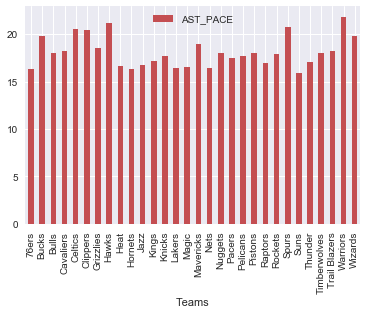

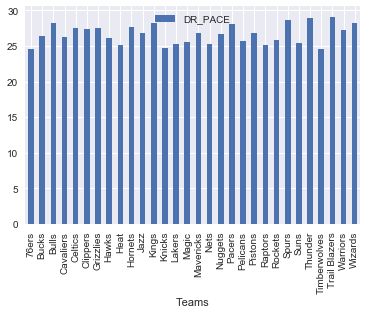

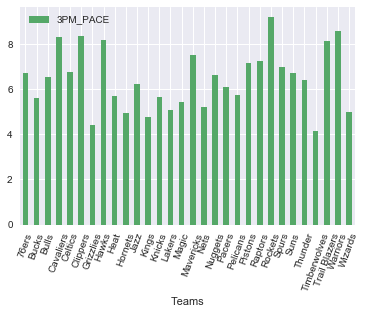

In [43]:
# bar graphs for each PACE/WIN correlation. 
# We ended up using a Pivot Graph in Excel for the presentation as it was easier to read for each team and year.

PACEASTdf.plot.bar(x= "Teams", y = "AST_PACE", color = "r")

PACEDRdf.plot.bar(x= "Teams", y = "DR_PACE", color = "b")

PACE3PMdf.plot.bar(x= "Teams", y = "3PM_PACE", color = "g")

plt.xticks(rotation=70)
plt.show()

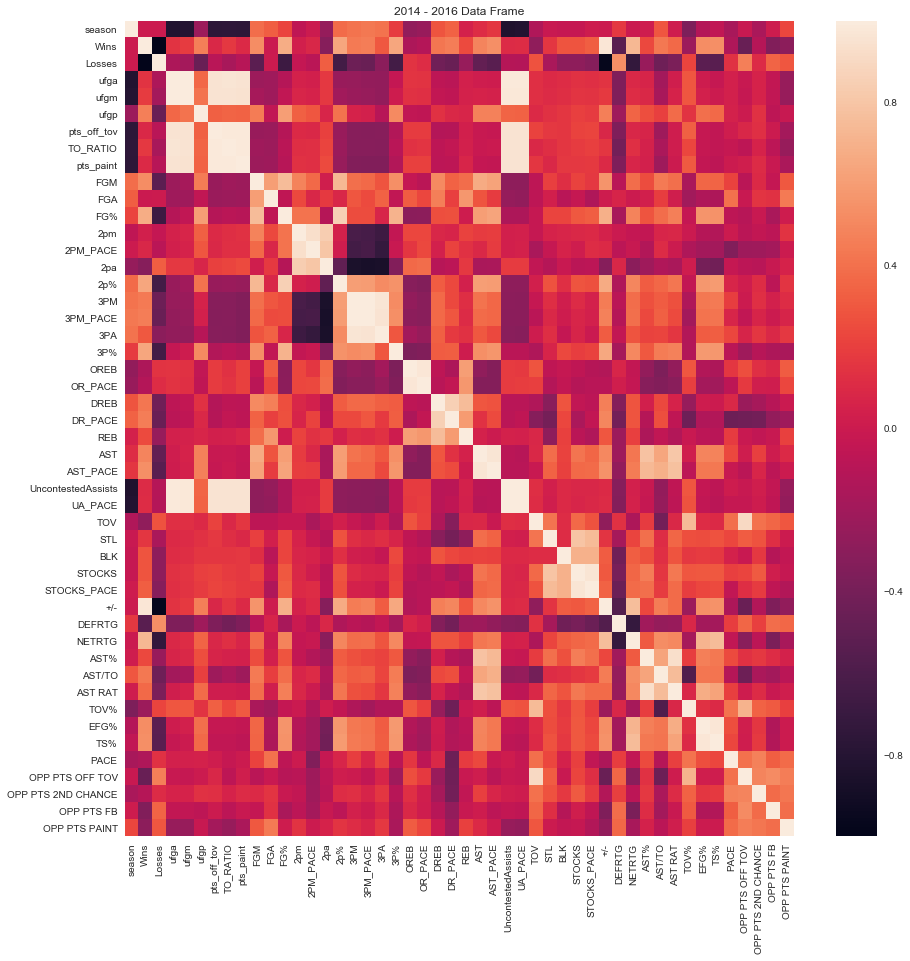

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDF4.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title("2014 - 2016 Data Frame")
plt.savefig("2014-2016 Correlation Matrix")
plt.show()

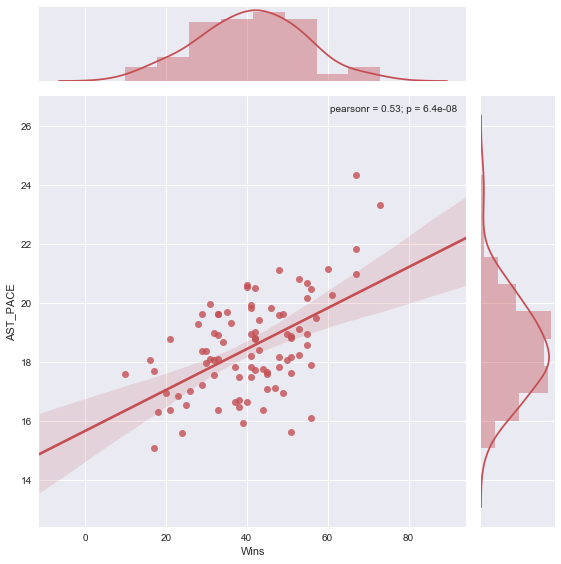

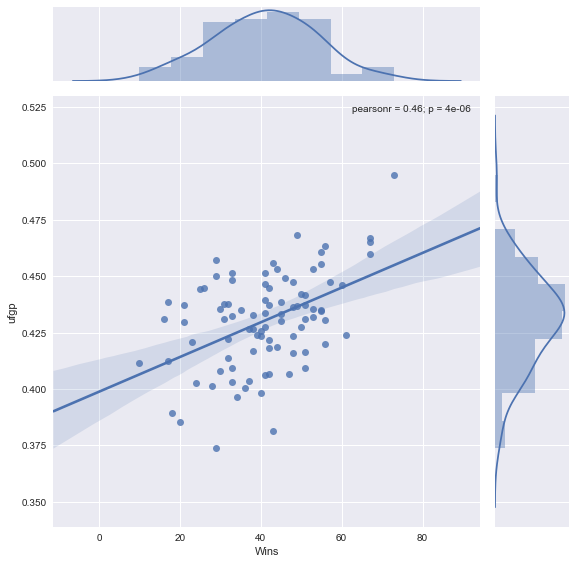

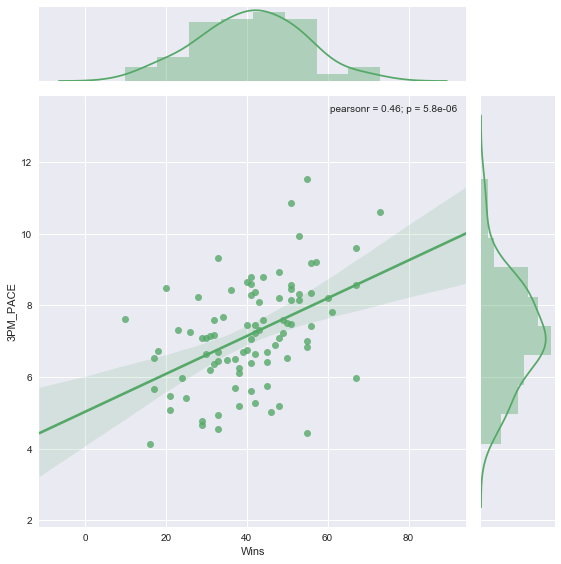

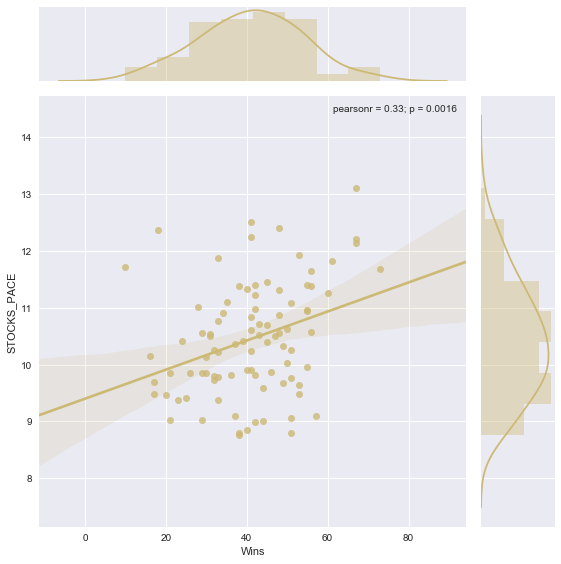

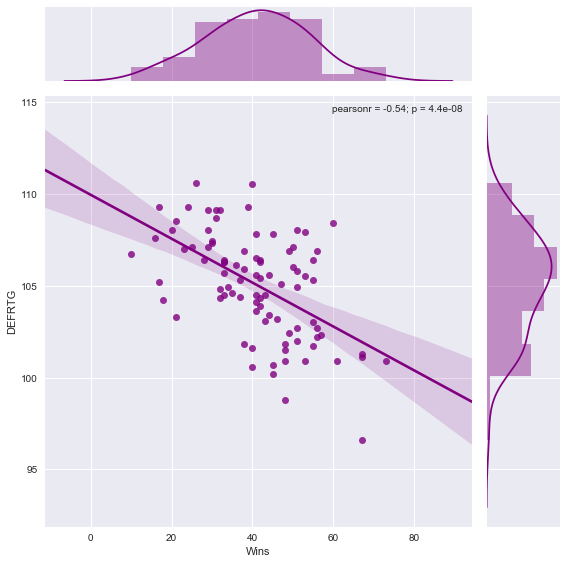

In [45]:
# linear regression FinalDF4
#sns.set(color_codes=True)
sns.jointplot(x="Wins", y="AST_PACE", data= FinalDF4, kind="reg", size=8, color='r')
plt.savefig('ASTPACEWINS.png')

sns.jointplot(x="Wins", y="ufgp", data= FinalDF4, kind="reg", size=8, color='b');
plt.savefig('UFGPWINS.png')

sns.jointplot(x="Wins", y="3PM_PACE", data= FinalDF4, kind="reg", size=8, color='g');
plt.savefig('3PMPACEWINS.png')

sns.jointplot(x="Wins", y="STOCKS_PACE", data= FinalDF4, kind="reg", size=8, color='y');
plt.savefig('STOCKSPACEWINS.png')

sns.jointplot(x="Wins", y="DEFRTG", data= FinalDF4, kind="reg", size=8, color='purple');
plt.savefig('DEFRTGWINS.png')

In [46]:
# Andy filter 2014
season_2014 = FinalDF4[FinalDF4['season']== 2014]
season_2014.reset_index(drop=True)
season_2014.sort_values('Wins', ascending=False).head()

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
84,Warriors,2014,67,15,16408,7664,0.467089,7050,5.640000,17724,3410,7137,47.8,2527,24.531599,4920,0.513618,883,8.571983,2217,39.8,853,8.280749,2814,27.317736,3667,2248,21.823124,3.409253,0.033096,1185,762,496,1258,12.212407,828,101.3,12.7,69.8,1.90,21.8,15.9,58.8,61.9,103.01,1250,1164,1142,3410
21,Hawks,2014,60,22,17052,7604,0.445930,6866,5.322481,16540,3121,6699,46.6,2303,23.087719,4547,0.506488,818,8.200501,2152,38.0,715,7.167920,2611,26.175439,3326,2111,21.162907,3.602084,0.036111,1167,744,380,1124,11.268170,445,108.4,-5.1,61.2,1.50,17.8,15.7,52.0,55.4,99.75,1290,1161,916,3232
15,Clippers,2014,56,26,16248,7528,0.463319,5926,4.865353,15028,3228,6830,47.3,2401,24.215835,4628,0.518799,827,8.340898,2202,37.6,784,7.907211,2711,27.342410,3495,2031,20.484115,3.706548,0.037383,1012,640,409,1049,10.579929,540,106.9,-1.9,53.9,1.36,15.6,15.1,50.9,54.8,99.15,1218,1048,1007,3184
66,Rockets,2014,56,26,14360,6028,0.419777,7330,4.873670,17984,3032,6832,44.4,2099,20.659449,4152,0.505539,933,9.183071,2680,34.8,958,9.429134,2624,25.826772,3582,1820,17.913386,3.312088,0.032599,1366,776,407,1183,11.643701,282,102.2,11.2,57.8,1.49,17.1,15.1,56.5,60.4,101.60,1504,1149,1253,3616
18,Grizzlies,2014,55,27,13568,5896,0.434552,5658,4.886010,15808,3097,6763,45.8,2674,27.953167,5517,0.484684,423,4.421911,1246,33.9,856,8.948359,2634,27.535020,3490,1777,18.576207,3.317952,0.034685,1094,700,347,1047,10.945014,266,105.3,-4.0,58.9,1.42,16.7,15.3,50.3,54.5,95.66,1158,954,1101,3196


In [47]:
# import season 2014
season_2014_final = pd.read_csv('season_2014.csv')

# filter for warriors
warriors_2014 = season_2014_final[season_2014_final['team']== 'Warriors']
warriors_2014.head()

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
28,Warriors,2014,67,15,16408,7664,0.467089,7050,5.64,17724,3410,7137,47.8,2527,24.531599,4920,0.513618,883,8.571983,2217,39.8,853,8.280749,2814,27.317736,3667,2248,21.823124,3.409253,0.033096,1185,762,496,1258,12.212407,828,101.3,12.7,69.8,1.9,21.8,15.9,58.8,61.9,103.01,1250,1164,1142,3410


In [48]:
# filter for timberwolves
timberwolves_2014 = season_2014_final[season_2014_final['team']== 'Timberwolves']
timberwolves_2014

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
26,Timberwolves,2014,16,66,10476,4516,0.431081,5714,4.004205,14652,2986,6820,43.8,2580,26.307739,5597,0.460961,406,4.1399,1223,33.2,949,9.676761,2406,24.533496,3355,1771,18.05853,2.549972,0.026002,1231,668,327,995,10.145814,-721,107.6,1.4,57.0,1.65,17.2,14.0,52.0,56.3,98.07,1427,1223,1175,3938


In [49]:
# merge warriors and timberwolves 2014 on team
warriors_timberwolves_2014 = pd.concat([warriors_2014,timberwolves_2014])
warriors_timberwolves_2014.reset_index(drop=True)
# FinalDF3 = FinalDF2.merge(teamDef_final, on = ["team","season"])

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,Warriors,2014,67,15,16408,7664,0.467089,7050,5.640000,17724,3410,7137,47.8,2527,24.531599,4920,0.513618,883,8.571983,2217,39.8,853,8.280749,2814,27.317736,3667,2248,21.823124,3.409253,0.033096,1185,762,496,1258,12.212407,828,101.3,12.7,69.8,1.90,21.8,15.9,58.8,61.9,103.01,1250,1164,1142,3410
1,Timberwolves,2014,16,66,10476,4516,0.431081,5714,4.004205,14652,2986,6820,43.8,2580,26.307739,5597,0.460961,406,4.139900,1223,33.2,949,9.676761,2406,24.533496,3355,1771,18.058530,2.549972,0.026002,1231,668,327,995,10.145814,-721,107.6,1.4,57.0,1.65,17.2,14.0,52.0,56.3,98.07,1427,1223,1175,3938


**Plot Warriors vs TimberWolves**
<br><br><br>

In [ ]:
# save warriors_timberwolves_2014 to csv
# warriors_timberwolves_2014.to_csv('warriors_timberwolves_2014.csv')

In [50]:
# use patrick's function to find correlation
def get_corrs(warriors_timberwolves_2014):
    col_correlations = warriors_timberwolves_2014.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations
    return cor_pairs.to_dict()

warriors_timberwolves_2014_corrs = get_corrs(warriors_timberwolves_2014)

warriors_timberwolves_2014_corrs_DF = pd.DataFrame.from_dict(warriors_timberwolves_2014_corrs)
#warriors_timberwolves_2014_corrs_DF

In [ ]:
# save 2014 to csv 
# season_2014.to_csv('season_2014.csv', index=False)

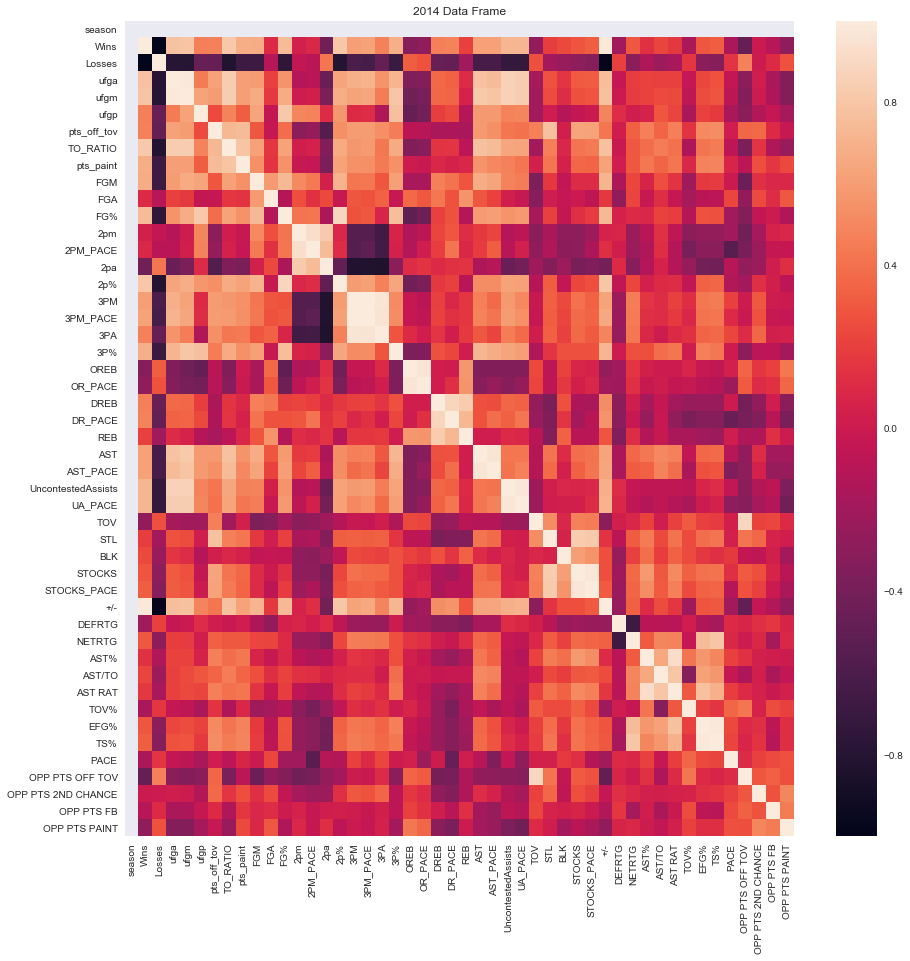

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = season_2014.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title("2014 Data Frame")
plt.savefig("2014CorrelationMatrix.png")
plt.show()

In [ ]:
# Andy - drop non playoff teams

In [ ]:
# Andy filter out 2014 playoff teams

In [52]:
# filter 2015
season_2015 = FinalDF4[FinalDF4['season']== 2015]
season_2015.reset_index(drop=True).head()

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,76ers,2015,10,72,12640,5200,0.411392,7514,4.584503,18092,2970,6887,43.1,2206,22.009378,4632,0.476252,764,7.622468,2255,33.9,777,7.752170,2605,25.990222,3382,1765,17.609498,2.946176,0.029394,1343,680,495,1175,11.723037,-839,106.7,-10.0,59.4,1.31,16.3,16.2,48.7,51.9,100.23,1639,1207,1370,3736
1,Bucks,2015,33,49,9676,4340,0.448532,5922,4.075705,15476,3145,6740,46.7,2705,28.016572,5463,0.495149,440,4.557224,1277,34.5,858,8.886587,2559,26.504402,3417,1895,19.627136,2.290237,0.023721,1247,672,475,1147,11.879855,-343,105.7,-3.5,60.3,1.52,17.7,15.7,49.9,53.7,96.55,1453,1153,1068,3606
2,Bulls,2015,42,40,13356,5840,0.437257,6488,4.937595,17716,3165,7170,44.1,2514,25.587786,5417,0.464095,651,6.625954,1753,37.1,907,9.231552,2889,29.404580,3796,1870,19.033079,3.122995,0.031786,1141,495,470,965,9.821883,-121,103.9,-1.8,59.1,1.64,17.1,14.0,48.7,52.6,98.25,1314,1169,1128,3642
3,Cavaliers,2015,57,25,15932,7128,0.447401,6218,4.865415,15892,3171,6888,46.0,2291,23.994554,4460,0.513677,880,9.216590,2428,36.2,873,9.143276,2777,29.084625,3650,1861,19.490993,3.830199,0.040115,1114,551,317,868,9.090909,492,102.3,5.8,58.7,1.67,17.5,14.1,52.4,55.8,95.48,1278,919,917,3344
4,Celtics,2015,48,34,13976,5812,0.415856,7596,6.272502,19812,3216,7318,43.9,2499,24.705882,5176,0.482805,717,7.088482,2142,33.5,950,9.391992,2733,27.019278,3683,1981,19.584775,2.933872,0.029005,1127,752,348,1100,10.874938,263,100.9,3.0,61.6,1.76,17.6,13.5,48.8,53.1,101.15,1211,1164,888,3524


In [ ]:
# save 2015 to csv 
# season_2015.to_csv('season_2015.csv', index=False)

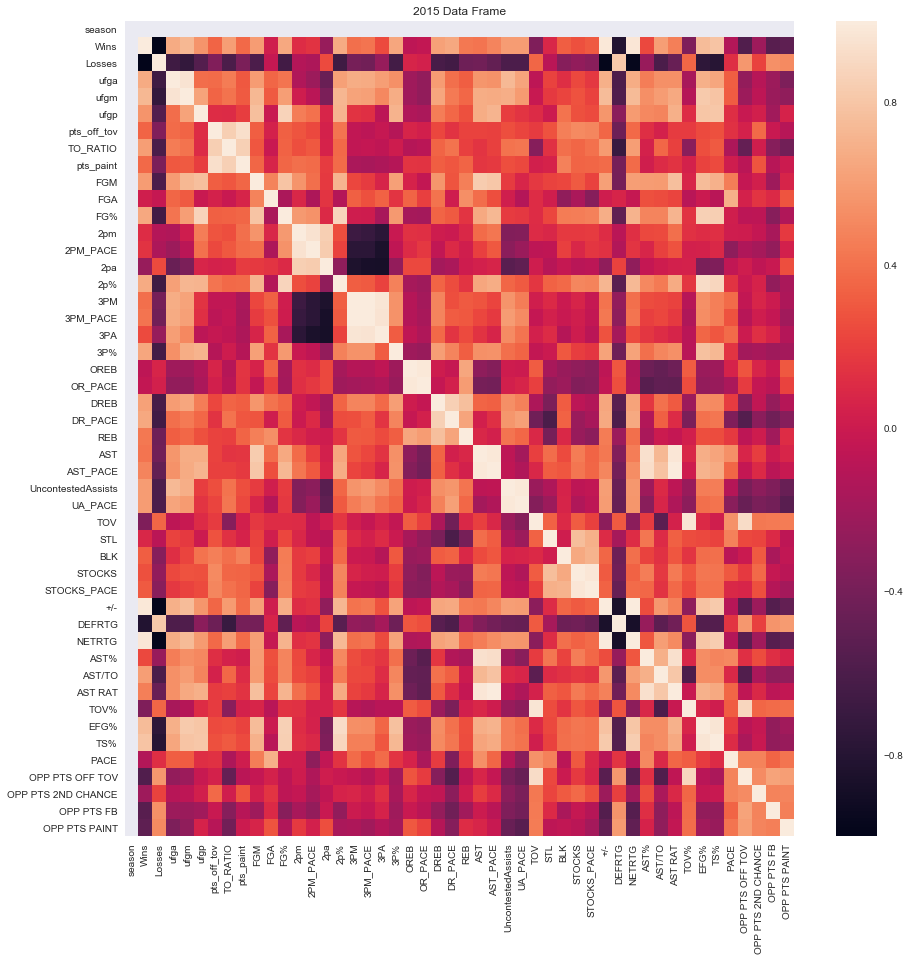

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = season_2015.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title("2015 Data Frame")
plt.savefig("2015CorrelationMatrix.png")
plt.show()

In [54]:
# filter 2016
season_2016 = FinalDF4[FinalDF4['season']== 2016]
season_2016.reset_index(drop=True).head()

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,76ers,2016,28,54,1564,628,0.401535,626,0.412657,1520,3088,6992,44.2,2257,22.355388,4549,0.496153,831,8.230983,2443,34.0,807,7.993265,2706,26.802694,3513,1949,19.304675,0.322217,0.003192,1366,692,420,1112,11.014263,-467,106.4,-5.7,63.1,1.43,17.6,16.4,50.1,53.9,100.96,1517,1106,1256,3698
1,Bucks,2016,42,40,1288,524,0.406832,660,0.495868,1644,3182,6715,47.4,2462,25.452290,4769,0.516251,720,7.443399,1946,37.0,723,7.474413,2589,26.765223,3312,1984,20.510700,0.264113,0.002730,1145,666,436,1102,11.392536,-15,106.4,0.5,62.4,1.73,18.6,14.4,52.7,56.5,96.73,1331,1040,961,3580
2,Bulls,2016,41,41,1476,640,0.433604,670,0.528808,1800,3169,7141,44.4,2546,26.054032,5310,0.479473,623,6.375358,1831,34.0,999,10.223086,2797,28.622595,3796,1851,18.941875,0.345759,0.003538,1112,643,393,1036,10.601719,35,104.5,0.1,58.4,1.66,17.0,13.8,48.7,53.0,97.72,1267,977,1125,3710
3,Cavaliers,2016,51,31,1400,612,0.437143,500,0.366300,1260,3275,6963,47.0,2208,22.443586,4184,0.527725,1067,10.845700,2779,38.4,766,7.786135,2821,28.674527,3587,1858,18.885952,0.329386,0.003348,1121,539,327,866,8.802602,261,108.0,2.9,56.7,1.66,17.2,13.7,54.7,58.0,98.38,1365,1122,1094,3650
4,Celtics,2016,53,29,1396,608,0.435530,562,0.451406,1560,3168,6978,45.4,2183,21.979460,4236,0.515345,985,9.917439,2742,35.9,744,7.490938,2698,27.164720,3442,2069,20.831655,0.293862,0.002959,1088,617,340,957,9.635522,216,105.5,3.1,65.3,1.90,18.9,13.3,52.5,56.7,99.32,1245,1143,1002,3544


In [ ]:
# save 2016 to csv 
# season_2016.to_csv('season_2016.csv', index=False)

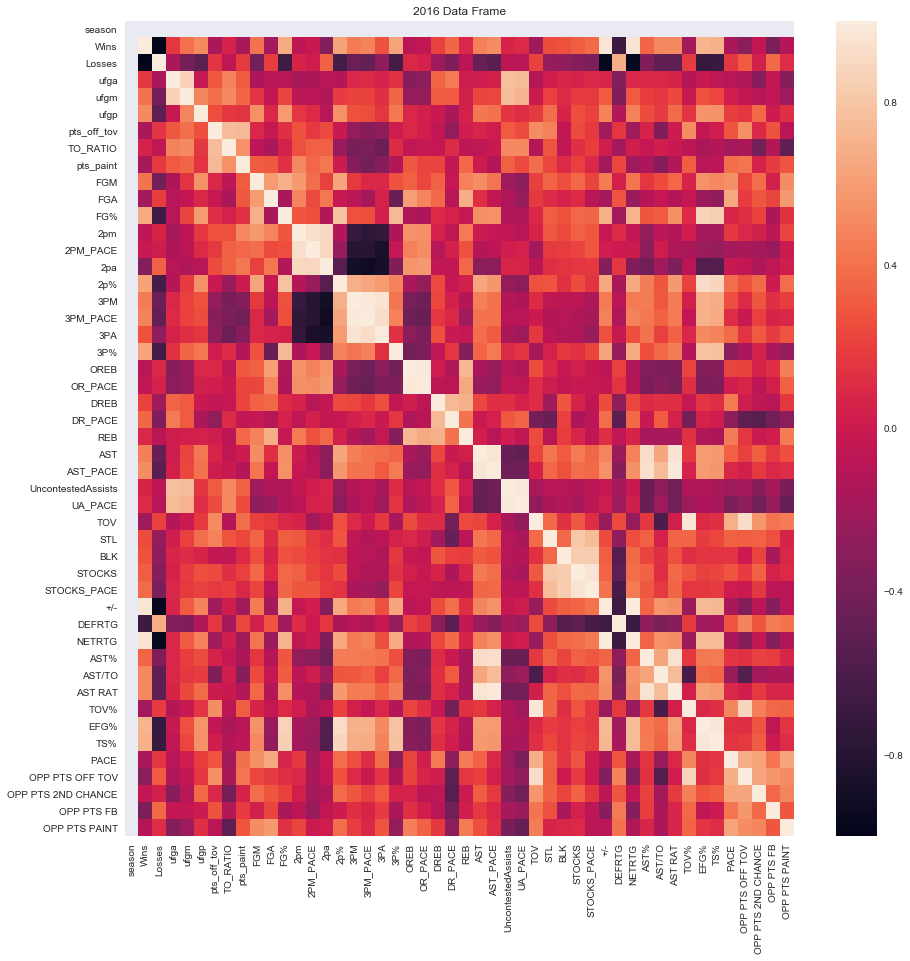

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = season_2016.corr()
# corr = season_2016_final.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title("2016 Data Frame")
plt.savefig("2016CorrelationMatrix.png")
plt.show()

<br><br>
**Analyze Correlation for all seasons bewtween Wins and Defensive Stats**

In [56]:
# lorenzo uncontested statistics DF
FinalDF4_uncontested = FinalDF4.filter(['pts_off_tov', 'Wins', 'STOCKS', 'STOCKS_PACE','DR_PACE', 'ufgm', 'UA_PACE'])

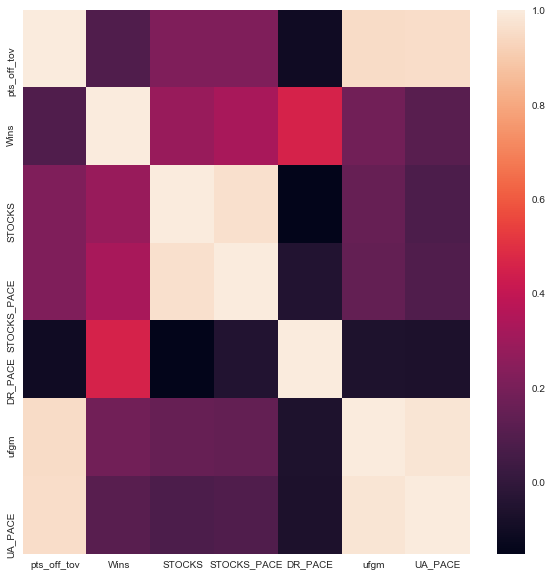

In [57]:
# uncontested - heat map

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDF4_uncontested.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            );

plt.savefig("UncontestedCorrelationMatrix.png")

# no major correlations found

In [196]:
# Andy - analyze defensive stats
FinalDF4_defense = FinalDF4.filter(['team', 'pts_off_tov', 'Wins', 'DREB', 'DEFRTG', 'STOCKS'])

In [197]:
# Andy - print defense DF
FinalDF4_defense.head()

,team,pts_off_tov,Wins,DREB,DEFRTG,STOCKS
0,76ers,6202,18,2536,104.2,1276
1,76ers,7514,10,2605,106.7,1175
2,76ers,626,28,2706,106.4,1112
3,Bucks,6326,41,2574,106.5,1192
4,Bucks,5922,33,2559,105.7,1147


In [198]:
# Andy - get shape of defense DF
FinalDF4_defense.shape

(90, 6)

In [199]:
# Sort Win Columns 
FinalDF4_defense.sort_values('Wins', ascending=False).head()

,team,pts_off_tov,Wins,DREB,DEFRTG,STOCKS
85,Warriors,6948,73,2972,100.9,1187
70,Spurs,7772,67,2831,96.6,1162
86,Warriors,640,67,2873,101.1,1340
84,Warriors,7050,67,2814,101.3,1258
71,Spurs,568,61,2777,100.9,1139


In [200]:
# Andy - Correlation test pts_off_tov and Wins
FinalDF4_defense['Wins'].corr(FinalDF4_defense['pts_off_tov'])

0.087865470605446208

In [201]:
# Andy - Correlation test
FinalDF4_defense[['Wins', 'pts_off_tov']].corr()

,Wins,pts_off_tov
Wins,1.000000,0.087865
pts_off_tov,0.087865,1.000000


**Positive Correlation between Wins and Defensive Rebounds**

In [202]:
# Andy - Correlation DREB
FinalDF4_defense[['Wins', 'DREB']].corr()

,Wins,DREB
Wins,1.000000,0.428598
DREB,0.428598,1.000000


In [203]:
FinalDF4_defense[['Wins', 'STOCKS']].corr()

,Wins,STOCKS
Wins,1.000000,0.287894
STOCKS,0.287894,1.000000


In [204]:
# Andy - Points allowed per 100 posessions
FinalDF4_defense[['Wins', 'DEFRTG']].corr()

,Wins,DEFRTG
Wins,1.000000,-0.538448
DEFRTG,-0.538448,1.000000


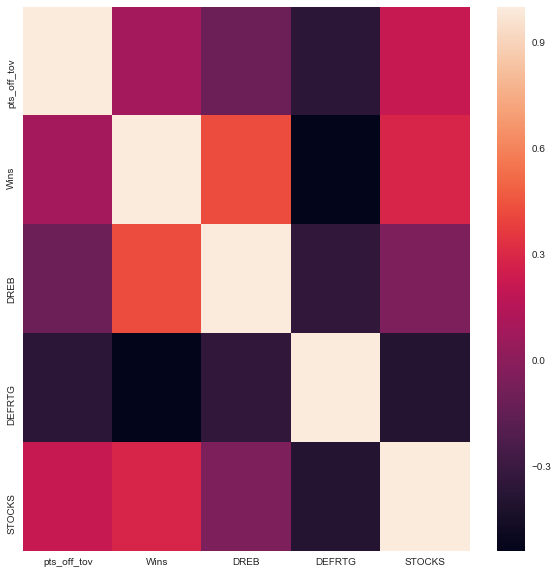

In [205]:
# Andy - heat map

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDF4_defense.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            );

plt.savefig("DefenseCorrelationMatrix.png")

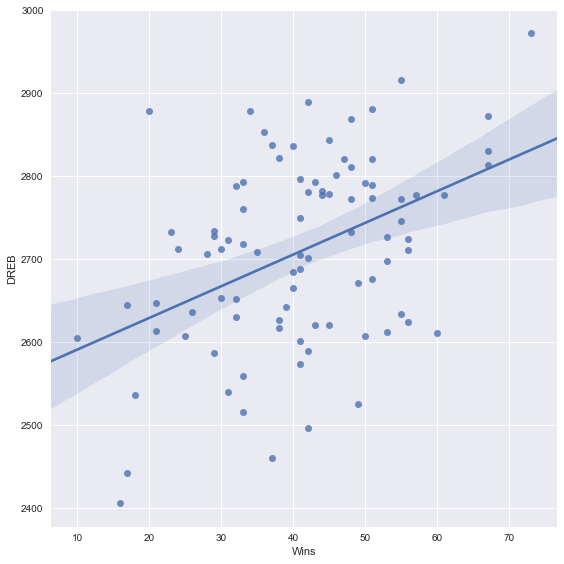

In [206]:
# Andy - linear regression wins vs dreb
sns.set(color_codes=True)
sns.lmplot(x="Wins", y="DREB", data=FinalDF4_defense, size=8);

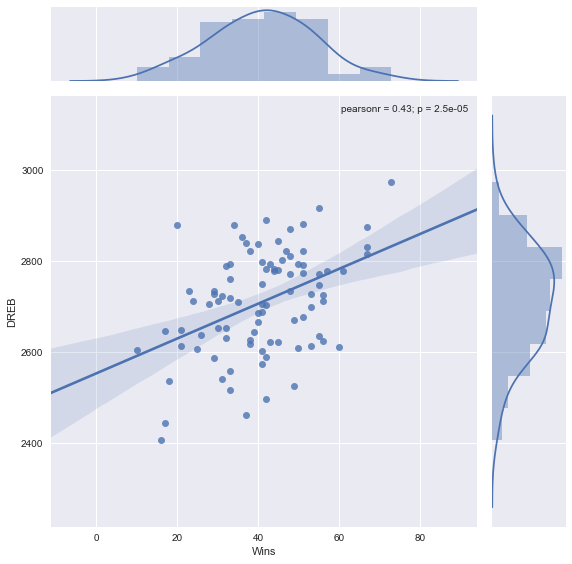

In [207]:
# Andy - linear regression 2
sns.set(color_codes=True)
sns.jointplot(x="Wins", y="DREB", data=FinalDF4_defense, kind="reg", size=8);
plt.savefig('test.png')

In [208]:
# Andy - Sort DF by DREB
FinalDF4_defense.sort_values('DREB', ascending=False).head()

,team,pts_off_tov,Wins,DREB,DEFRTG,STOCKS
85,Warriors,6948,73,2972,100.9,1187
76,Thunder,8906,55,2916,103.0,1090
7,Bulls,6488,42,2889,103.9,965
81,Trail Blazers,5018,51,2881,102.0,897
50,Nets,640,20,2879,108.0,980


In [209]:
# Patrick - Correlation function that correlates every column pair for all 3 years all teams
def get_corrs(FinalDF4):
    col_correlations = FinalDF4.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations
    return cor_pairs.to_dict()

NBA_corrs = get_corrs(FinalDF4)

In [210]:
NBA_corrs_DF = pd.DataFrame.from_dict(NBA_corrs)
NBA_corrs_DF.sort_values('Wins', ascending=False).head()

,+/-,2PM_PACE,2p%,2pa,2pm,3P%,3PA,3PM,3PM_PACE,AST,AST RAT,AST%,AST/TO,AST_PACE,BLK,DEFRTG,DREB,DR_PACE,EFG%,FG%,FGA,FGM,Losses,NETRTG,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS OFF TOV,OPP PTS PAINT,OREB,OR_PACE,PACE,REB,STL,STOCKS,STOCKS_PACE,TOV,TOV%,TO_RATIO,TS%,UA_PACE,UncontestedAssists,Wins,pts_off_tov,pts_paint,season,ufga,ufgm,ufgp
+/-,0.000000,0.095928,0.669200,-0.321485,0.048159,0.652905,0.312543,0.449320,0.468896,0.504113,0.0,0.0,0.0,0.552493,0.314738,0.000000,0.465123,0.495776,0.0,0.689988,0.011535,0.555802,-0.974556,0.0,0.0,0.0,0.0,0.0,-0.121280,-0.088656,0.0,0.292244,0.151038,0.301543,0.343191,-0.275970,0.0,0.160770,0.0,0.106785,0.101266,0.974556,0.083497,0.095913,0.000000,0.144377,0.179169,0.463960
NETRTG,0.765463,-0.016469,0.494785,-0.299261,-0.038967,0.504633,0.286391,0.389167,0.398098,0.428466,0.0,0.0,0.0,0.450496,0.326020,-0.712688,0.282698,0.284255,0.0,0.480424,0.001806,0.387500,-0.730604,0.0,0.0,0.0,0.0,0.0,-0.045608,-0.034924,0.0,0.196089,0.220650,0.358795,0.377147,-0.145695,0.0,0.125157,0.0,0.047557,0.046753,0.730604,0.078141,0.074900,-0.000549,0.086631,0.110710,0.351491
FG%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.056556,0.756814,-0.671915,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.078221,0.0,0.000000,0.000000,0.671915,-0.107133,-0.097517,0.220713,-0.102813,-0.047249,0.605021
2p%,0.000000,0.019114,0.000000,-0.497803,0.047465,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.852711,0.080140,0.729569,-0.647861,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.228831,0.0,0.000000,0.000000,0.647861,-0.240459,-0.245579,0.375289,-0.241527,-0.199578,0.413482
3P%,0.000000,-0.014619,0.552294,-0.336299,-0.041163,0.000000,0.295958,0.520755,0.537416,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.703748,-0.048819,0.531301,-0.645009,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.086189,0.0,0.000000,0.000000,0.645009,-0.120684,-0.122405,0.182341,-0.036356,0.012134,0.509229


In [ ]:
# andy - saving NBA_corrs_DF to csv
# NBA_corrs_DF.to_csv('NBA_corrs_2014-2016.csv')

In [211]:
def get_corrs(season_2014):
    col_correlations = season_2014.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations
    return cor_pairs.to_dict()

NBA_2014_corrs = get_corrs(season_2014)

NBA_corrs_2014_DF = pd.DataFrame.from_dict(NBA_2014_corrs)
NBA_corrs_2014_DF.sort_values('Wins', ascending=False).head()

,+/-,2PM_PACE,2p%,2pa,2pm,3P%,3PA,3PM,3PM_PACE,AST,AST RAT,AST%,AST/TO,AST_PACE,BLK,DEFRTG,DREB,DR_PACE,EFG%,FG%,FGA,FGM,Losses,NETRTG,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS OFF TOV,OPP PTS PAINT,OREB,OR_PACE,PACE,REB,STL,STOCKS,STOCKS_PACE,TOV,TOV%,TO_RATIO,TS%,UA_PACE,UncontestedAssists,Wins,pts_off_tov,pts_paint,season,ufga,ufgm,ufgp
+/-,0.0,0.117293,0.799016,-0.406475,0.055658,0.723818,0.487533,0.631624,0.662032,0.63327,0.0,0.0,0.0,0.644174,0.261552,0.0,0.52694,0.557762,0.0,0.741507,0.166376,0.715615,-0.977663,0.0,0.0,0.0,0.0,0.0,-0.255664,-0.196583,0.0,0.289062,0.14481,0.261742,0.311636,-0.301445,0.0,0.774308,0.0,0.705926,0.689926,0.977663,0.422501,0.632369,NaN,0.765337,0.779406,0.485536
TO_RATIO,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-0.813281,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.813281,0.727608,0.000000,NaN,0.832501,0.841263,0.481927
2p%,0.0,0.111842,0.000000,-0.495980,0.083354,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.886379,-0.016008,0.706671,-0.811043,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.667247,0.0,0.000000,0.000000,0.811043,0.536670,0.631823,NaN,0.634009,0.684661,0.571725
ufgm,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-0.792138,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.792138,0.000000,0.000000,NaN,0.976997,0.000000,0.000000
ufga,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-0.787584,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.787584,0.000000,0.000000,NaN,0.000000,0.000000,0.000000


In [ ]:
# save 2014 to csv
# NBA_corrs_2014_DF.to_csv('NBA_corrs_2014.csv')

In [212]:
def get_corrs(season_2015):
    col_correlations = season_2015.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations
    return cor_pairs.to_dict()

NBA_2015_corrs = get_corrs(season_2015)

NBA_corrs_2015_DF = pd.DataFrame.from_dict(NBA_2015_corrs)
NBA_corrs_2015_DF.sort_values('Wins', ascending=False).head()

,+/-,2PM_PACE,2p%,2pa,2pm,3P%,3PA,3PM,3PM_PACE,AST,AST RAT,AST%,AST/TO,AST_PACE,BLK,DEFRTG,DREB,DR_PACE,EFG%,FG%,FGA,FGM,Losses,NETRTG,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS OFF TOV,OPP PTS PAINT,OREB,OR_PACE,PACE,REB,STL,STOCKS,STOCKS_PACE,TOV,TOV%,TO_RATIO,TS%,UA_PACE,UncontestedAssists,Wins,pts_off_tov,pts_paint,season,ufga,ufgm,ufgp
+/-,0.000000,0.136350,0.718980,-0.278969,0.111570,0.626864,0.273702,0.411579,0.434442,0.431722,0.000000,0.000000,0.000000,0.498382,0.354490,0.000000,0.640949,0.660858,0.000000,0.680311,0.016846,0.612369,-0.979492,0.000000,0.0,0.0,0.0,0.0,-0.066621,-0.046747,0.0,0.448626,0.106532,0.308489,0.342421,-0.290956,0.000000,0.591053,0.0,0.601530,0.608235,0.979492,0.358121,0.376642,NaN,0.692843,0.752012,0.564152
NETRTG,0.994498,0.154131,0.740147,-0.277634,0.125057,0.630396,0.249472,0.392017,0.415074,0.456120,0.000000,0.000000,0.000000,0.529427,0.395500,-0.871068,0.631251,0.658872,0.000000,0.709286,-0.031055,0.608111,-0.973796,0.000000,0.0,0.0,0.0,0.0,-0.140536,-0.117561,0.0,0.394157,0.112492,0.339381,0.377624,-0.302160,0.000000,0.604302,0.0,0.569488,0.572251,0.973796,0.369244,0.382063,NaN,0.675549,0.743704,0.588147
TS%,0.823695,0.089380,0.888358,-0.354226,0.127867,0.731555,0.292745,0.466742,0.464708,0.633730,0.658991,0.489186,0.527468,0.671345,0.395471,-0.559155,0.513201,0.427758,0.961364,0.847383,-0.092929,0.696221,-0.795030,0.839864,0.0,0.0,0.0,0.0,-0.215160,-0.237079,0.0,0.256230,0.214708,0.416394,0.406247,0.026640,0.018518,0.307046,0.0,0.410434,0.455500,0.795030,0.265790,0.249540,NaN,0.648257,0.790013,0.811782
EFG%,0.787093,0.054458,0.914661,-0.379644,0.115505,0.776522,0.358486,0.534425,0.526236,0.683781,0.697249,0.527027,0.525673,0.708583,0.388320,-0.565869,0.527125,0.400896,0.000000,0.854483,-0.006264,0.756314,-0.756286,0.803446,0.0,0.0,0.0,0.0,-0.227873,-0.264366,0.0,0.258806,0.237231,0.428765,0.400858,0.094346,0.070454,0.258851,0.0,0.393405,0.454322,0.756286,0.248387,0.214746,NaN,0.694054,0.827859,0.804641
ufgm,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.732836,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.732836,0.000000,0.000000,NaN,0.960174,0.000000,0.000000


In [ ]:
# save 2015 to csv
# NBA_corrs_2015_DF.to_csv('NBA_corrs_2015.csv')

In [213]:
def get_corrs(season_2016):
    col_correlations = season_2016.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations
    return cor_pairs.to_dict()

NBA_2016_corrs = get_corrs(season_2016)

NBA_corrs_2016_DF = pd.DataFrame.from_dict(NBA_2016_corrs)
NBA_corrs_2016_DF.sort_values('Wins', ascending=False).head()

,+/-,2PM_PACE,2p%,2pa,2pm,3P%,3PA,3PM,3PM_PACE,AST,AST RAT,AST%,AST/TO,AST_PACE,BLK,DEFRTG,DREB,DR_PACE,EFG%,FG%,FGA,FGM,Losses,NETRTG,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS OFF TOV,OPP PTS PAINT,OREB,OR_PACE,PACE,REB,STL,STOCKS,STOCKS_PACE,TOV,TOV%,TO_RATIO,TS%,UA_PACE,UncontestedAssists,Wins,pts_off_tov,pts_paint,season,ufga,ufgm,ufgp
+/-,0.000000,0.021718,0.655394,-0.326804,-0.036293,0.645877,0.266315,0.441898,0.472388,0.490529,0.000000,0.000000,0.000000,0.550636,0.327946,0.000000,0.250862,0.383504,0.000000,0.702967,-0.177927,0.451447,-0.964266,0.000000,0.0,0.0,0.0,0.0,-0.075500,-0.042313,0.0,0.118723,0.248675,0.350947,0.407286,-0.246895,0.000000,0.025651,0.0,0.009860,-0.025488,0.964266,-0.197891,-0.198822,NaN,0.073060,0.308436,0.480672
NETRTG,0.993723,0.001420,0.651078,-0.346518,-0.060178,0.664813,0.260239,0.440516,0.473140,0.475185,0.000000,0.000000,0.000000,0.537283,0.369612,-0.692401,0.233673,0.372428,0.000000,0.706537,-0.229480,0.417058,-0.954831,0.000000,0.0,0.0,0.0,0.0,-0.136905,-0.102929,0.0,0.063047,0.260619,0.384105,0.445293,-0.250285,0.000000,0.023991,0.0,0.023770,-0.012611,0.954831,-0.199865,-0.206839,NaN,0.078649,0.310155,0.473361
EFG%,0.740956,-0.223955,0.917728,-0.569698,-0.176952,0.781653,0.508116,0.701487,0.697586,0.600500,0.610824,0.436066,0.379612,0.593424,0.150532,-0.202241,0.154085,0.062156,0.000000,0.869997,-0.229303,0.552659,-0.717649,0.746932,0.0,0.0,0.0,0.0,-0.328376,-0.365467,0.0,-0.128441,0.186724,0.203308,0.168711,0.100857,0.087746,-0.149966,0.0,-0.148050,-0.137873,0.717649,-0.039839,-0.090364,NaN,-0.022225,0.269763,0.561409
TS%,0.733968,-0.243659,0.886702,-0.568504,-0.191952,0.773966,0.482968,0.673974,0.666848,0.580896,0.589550,0.437600,0.346999,0.570594,0.142285,-0.171066,0.121202,0.016455,0.972486,0.844446,-0.273222,0.500835,-0.697735,0.747177,0.0,0.0,0.0,0.0,-0.316183,-0.355467,0.0,-0.142363,0.229266,0.222867,0.187203,0.129341,0.118591,-0.116900,0.0,-0.169123,-0.157856,0.697735,0.024172,-0.072436,NaN,-0.057664,0.232354,0.547036
FG%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.164742,0.701500,-0.666766,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050817,0.0,0.000000,0.000000,0.666766,0.128777,0.136530,NaN,-0.091429,0.220941,0.586945


In [214]:
# save 2016 to csv
NBA_corrs_2016_DF.to_csv('NBA_corrs_2016.csv')

In [ ]:
# Andy import stats_corr table by wins
stats_corr_win = pd.read_csv('NBA_corrs_df_compare_years.csv')
stats_corr_win.sort_values(["Wins 2014-2016"], ascending = False)
stats_corr_win.to_csv("statsCorrWins.csv")


In [215]:
stats_corr_win_Final = pd.read_csv("statsCorrWins.csv")
stats_corr_win_Final

,Category,Wins 2014-2016,Wins 2014,Wins 2015,Wins 2016,Definition
0,AST_PACE,0.53,0.73,0.66,0.63,* Pace Adjusted Assists
1,ufgp,0.46,0.67,0.62,0.50,Uncontested field goal percent
2,DR_PACE,0.46,0.63,0.61,0.48,* Pace Adjusted Defensive Rebounds
3,3PM_PACE,0.46,0.62,0.61,0.47,* Pace Adjusted 3pt made
4,AST RAT,0.37,0.48,0.56,0.38,Assists per 100 possessions used
5,STOCKS_PACE,0.33,0.47,0.49,0.35,* Pace Adjusted for Steals and Blocks
6,UA_PACE,0.11,0.20,0.27,0.07,* Pace Adjusted Uncontested Assists
7,2PM_PACE,0.08,0.10,0.11,-0.01,* Pace Adjusted 2pt made
8,OR_PACE,-0.12,-0.10,-0.07,-0.15,* Pace Adjusted Offensive Rebounds
9,DEFRTG,-0.54,-0.47,-0.82,-0.68,Number of points allowed per 100 possesions by...


In [59]:
# sum of wins warriors
warriors_wins_df = FinalDF4[FinalDF4['team']== 'Warriors']
warriors_wins_df.head()

,team,season,Wins,Losses,ufga,ufgm,ufgp,pts_off_tov,TO_RATIO,pts_paint,FGM,FGA,FG%,2pm,2PM_PACE,2pa,2p%,3PM,3PM_PACE,3PA,3P%,OREB,OR_PACE,DREB,DR_PACE,REB,AST,AST_PACE,UncontestedAssists,UA_PACE,TOV,STL,BLK,STOCKS,STOCKS_PACE,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,TOV%,EFG%,TS%,PACE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
84,Warriors,2014,67,15,16408,7664,0.467089,7050,5.640000,17724,3410,7137,47.8,2527,24.531599,4920,0.513618,883,8.571983,2217,39.8,853,8.280749,2814,27.317736,3667,2248,21.823124,3.409253,0.033096,1185,762,496,1258,12.212407,828,101.3,12.7,69.8,1.90,21.8,15.9,58.8,61.9,103.01,1250,1164,1142,3410
85,Warriors,2015,73,9,16728,8280,0.494978,6948,5.090110,18348,3489,7159,48.7,2412,23.728480,4567,0.528137,1077,10.595180,2592,41.6,816,8.027545,2972,29.237580,3788,2373,23.344811,3.489254,0.034326,1245,689,498,1187,11.677324,882,100.9,11.6,68.0,1.91,20.5,14.9,56.3,59.3,101.65,1365,1130,1187,3698
86,Warriors,2016,67,15,1436,668,0.465181,640,0.466813,1684,3532,7140,49.5,2550,24.941315,4578,0.557012,982,9.604851,2562,38.3,770,7.531299,2873,28.100548,3643,2491,24.364241,0.268165,0.002623,1211,785,555,1340,13.106416,954,101.1,12.1,70.5,2.06,21.4,14.4,56.3,59.7,102.24,1371,1146,1182,3726


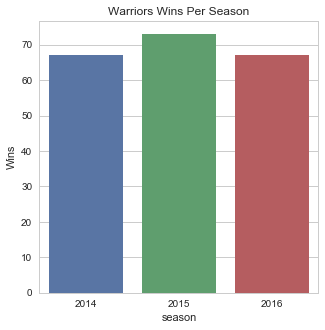

In [71]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
sns.barplot(x='season', y='Wins', data=warriors_wins_df)
plt.title("Warriors Wins Per Season");

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.barplot(x='Decade', y='Average_Made_Threes', data=champion)
plt.title("Increase in Three Point Shots Made Per Decade")
plt.savefig("Champion3pt.png")

In [65]:
# sum of wins drop warriors 
all_wins_df = FinalDF4[FinalDF4.team != 'Warriors']
all_wins_df.shape

(87, 49)

In [74]:
# all wins 2014 avg
wins_2014 = all_wins_df[all_wins_df['season']== 2014]
wins_2014['Wins'].mean()

40.10344827586207

In [75]:
# all wins 2015 avg
wins_2015 = all_wins_df[all_wins_df['season']== 2015]
wins_2015['Wins'].mean()

39.89655172413793

In [76]:
# all wins 2016 avg
wins_2016 = all_wins_df[all_wins_df['season']== 2016]
wins_2016['Wins'].mean()

40.10344827586207

In [78]:
# read positive corr sheet
positive_corr_df = pd.read_csv('positive_corr.csv')
positive_corr_df

,team,season,Wins,3PM_PACE,DR_PACE,AST_PACE
0,Warriors,2014,67.00,8.571,27.317,21.823
1,Warriors,2015,73.00,10.595,29.237,23.344
2,Warriors,2016,67.00,9.604,28.100,24.364
3,All,2014,40.10,6.374,26.640,18.003
4,All,2015,39.89,6.990,27.837,18.459
5,All,2016,40.10,7.959,27.715,18.596


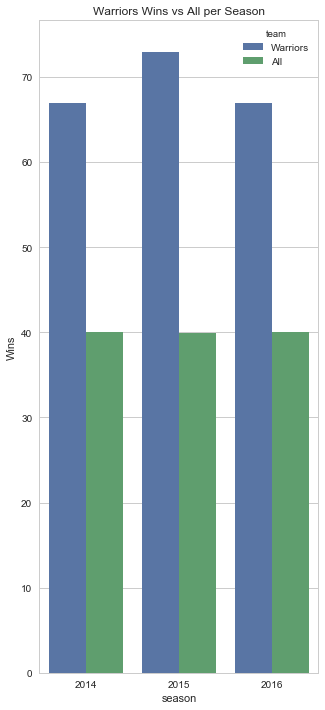

In [121]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(5,12))
sns.barplot(x='season', y='Wins', hue="team", data=positive_corr_df, capsize=.2)
plt.title("Warriors Wins vs All per Season");
plt.savefig('wins.png')

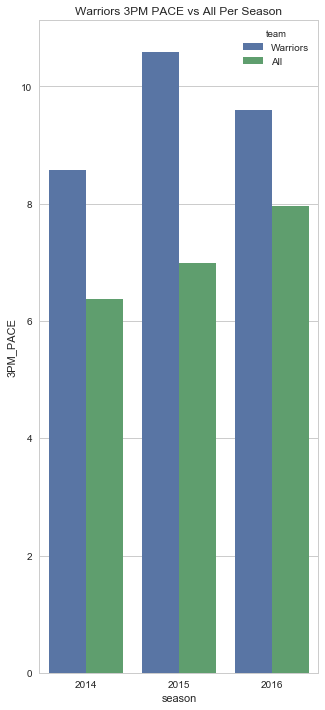

In [120]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(5,12))
sns.barplot(x='season', y='3PM_PACE', hue="team", data=positive_corr_df, capsize=.2)
plt.title("Warriors 3PM PACE vs All Per Season");
plt.savefig('3PM_PACE.png')

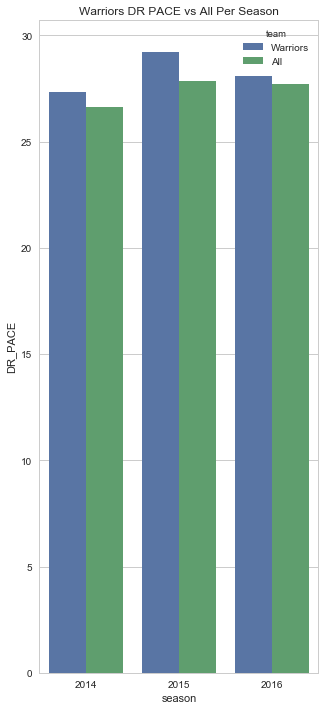

In [115]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(5,12))
sns.barplot(x='season', y='DR_PACE', hue="team", data=positive_corr_df, capsize=.2)
plt.title("Warriors DR PACE vs All Per Season");
plt.savefig('DR_PACE.png')

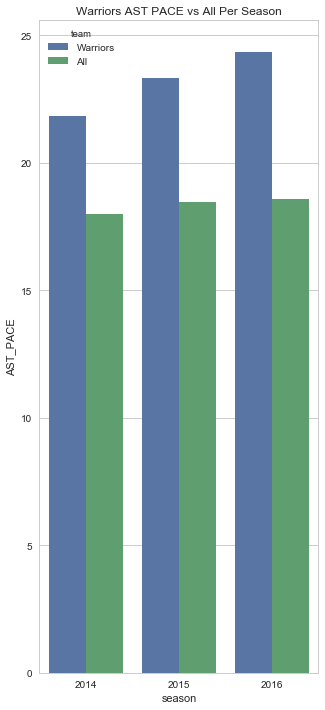

In [119]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(5,12))
sns.barplot(x='season', y='AST_PACE', hue="team", data=positive_corr_df, capsize=.2)
plt.title("Warriors AST PACE vs All Per Season");
plt.savefig('AST_PACE.png')

In [222]:
# read DEFRTG 
DEFRTG_df = pd.read_csv('DEFRTG_sum_v5.csv')
DEFRTG_df

,team,season,DEFRTG,Wins
0,Warriors,2014,101.30,67.00
1,Warriors,2015,100.90,73.00
2,Warriors,2016,101.10,67.00
3,All,2014,105.03,41.00
4,All,2015,103.97,40.42
5,All,2016,106.21,41.00


In [233]:
DEFRTG4_df = pd.read_csv('DEFRTG_sum_v4.csv')
DEFRTG4_df

,team,season,DEFRTG,Wins
0,Warriors,2014,101.30,67.00
1,Warriors,2015,100.90,73.00
2,Warriors,2016,101.10,67.00
3,Lakers,2014,103.30,21.00
4,Lakers,2015,109.30,17.00
5,Lakers,2016,110.60,26.00
6,Nets,2014,106.90,38.00
7,Nets,2015,108.50,21.00
8,Nets,2016,108.00,20.00
9,All,2014,105.03,41.00


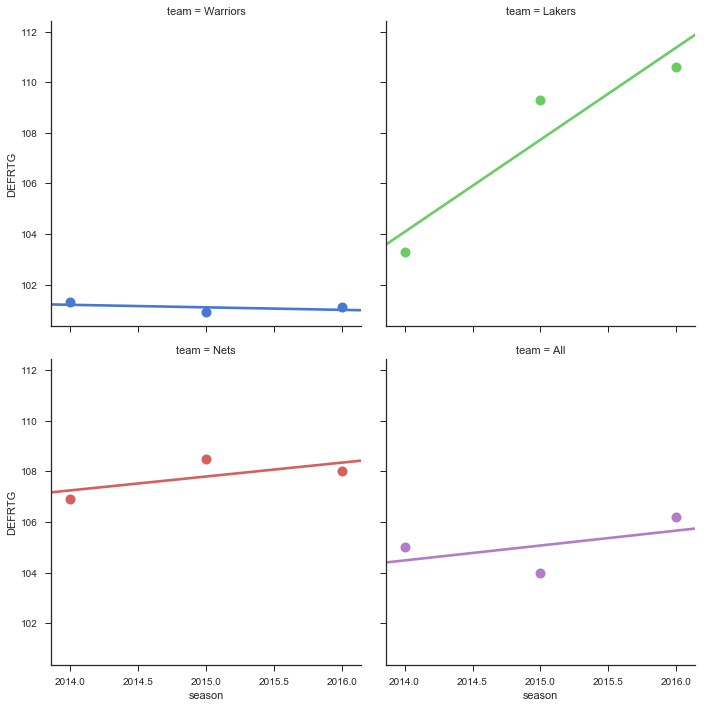

In [239]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="season", y="DEFRTG", col="team", hue="team", data=DEFRTG4_df,
           col_wrap=2, ci=None, palette="muted", size=5,
           scatter_kws={"s": 100, "alpha": 1});

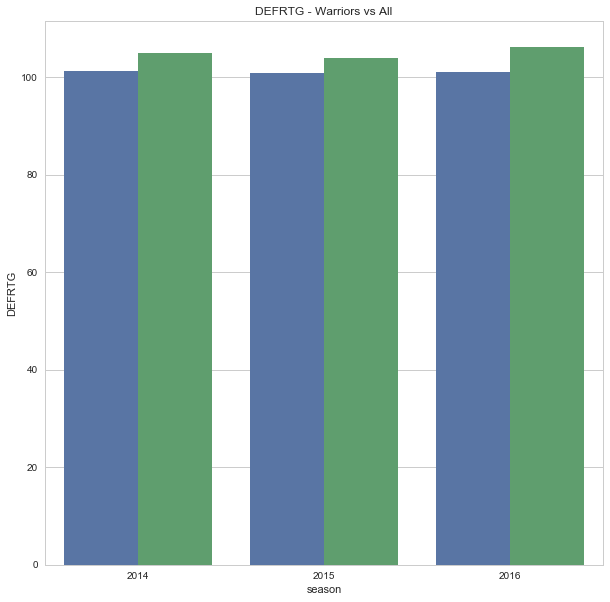

In [231]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(10,10))
ax = sns.barplot(x='season', y='DEFRTG', hue="team", data=DEFRTG_df,) #palette='muted'
ax.legend_.remove()
plt.title("DEFRTG - Warriors vs All")
plt.savefig('DEFRTG_sum3.png');

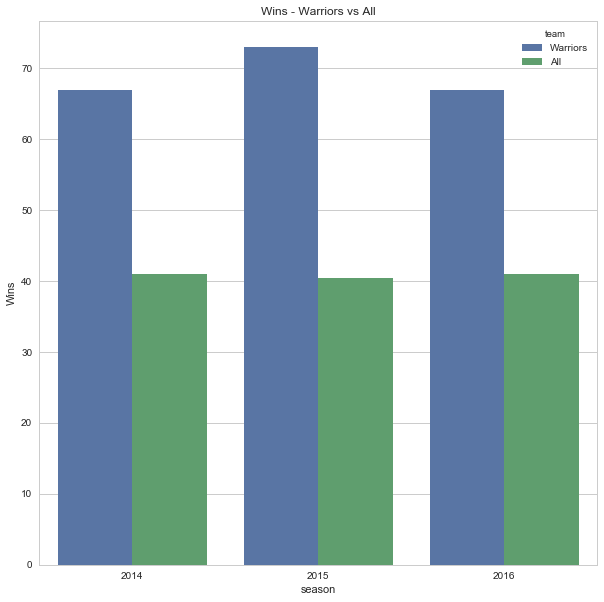

In [232]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(10,10))
sns.barplot(x='season', y='Wins', hue="team", data=DEFRTG_df,) # palette='muted'
plt.title("Wins - Warriors vs All")
plt.savefig('DEFRTG_wins3.png');

In [225]:
# read 2pt
# read DEFRTG 
twopoint_df = pd.read_csv('2pa_v3.csv')
twopoint_df

,team,season,Wins,2pa
0,Warriors,2014,67.00,4920.00
1,Warriors,2015,73.00,4567.00
2,Warriors,2016,67.00,4578.00
3,All,2014,41.00,5014.43
4,All,2015,40.42,4979.70
5,All,2016,41.00,4789.76


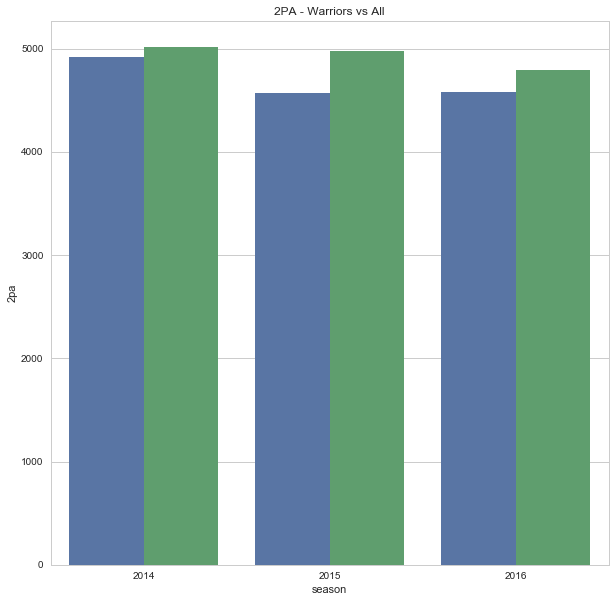

In [229]:
# bar plot for 2pt 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(10,10))
ax = sns.barplot(x='season', y='2pa', hue="team", data=twopoint_df,) #palette='muted'
ax.legend_.remove()
plt.title("2PA - Warriors vs All")
plt.savefig('2PA_2.png');

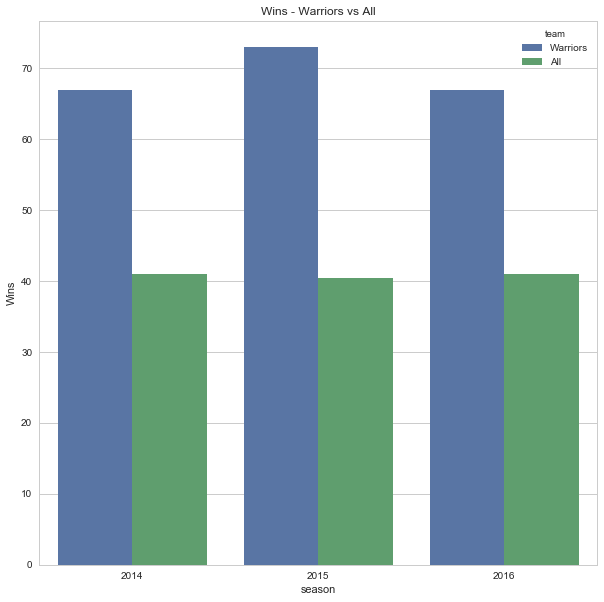

In [230]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(10,10))
sns.barplot(x='season', y='Wins', hue="team", data=twopoint_df,) #palette='muted'
plt.title("Wins - Warriors vs All")
plt.savefig('2pa_wins_2.png');

In [219]:
# read ORB_PACE
ORB_df = pd.read_csv('OR_PACEv2.csv')
ORB_df

,team,season,Wins,OR_PACE
0,Warriors,2014,67.00,8.28
1,Warriors,2015,73.00,8.02
2,Warriors,2016,67.00,7.53
3,All,2014,41.00,8.97
4,All,2015,40.42,8.73
5,All,2016,41.00,8.44


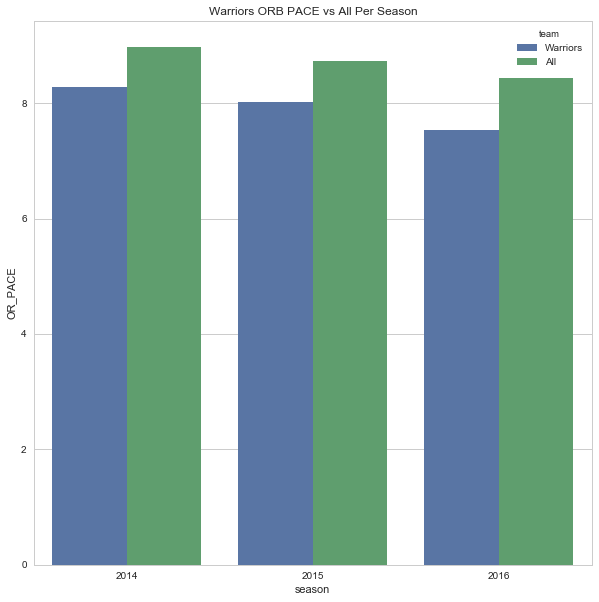

In [221]:
# bar plot for warriors wins 
sns.set_style("whitegrid")
# sns.set()
plt.figure(figsize=(10,10))
sns.barplot(x='season', y='OR_PACE', hue="team", data=ORB_df, capsize=.2)
plt.title("Warriors ORB PACE vs All Per Season");
plt.savefig('ORB_PACE.png')